<a href="https://colab.research.google.com/github/qbit-/isingtree_notebooks/blob/master/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
%pdb

Automatic pdb calling has been turned ON


In [0]:
! git clone --recursive https://github.com/qbit-/isingtree.git

Cloning into 'isingtree'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 107 (delta 24), reused 98 (delta 18), pack-reused 0
Receiving objects: 100% (107/107), 4.58 MiB | 19.05 MiB/s, done.
Resolving deltas: 100% (24/24), done.
Submodule 'graph_model' (https://github.com/qbit-/graph_model.git) registered for path 'graph_model'
Submodule 'thirdparty/dgf2wcnf' (https://github.com/qbit-/dgf2wcnf.git) registered for path 'thirdparty/dgf2wcnf'
Submodule 'thirdparty/open-wbo' (https://github.com/sat-group/open-wbo.git) registered for path 'thirdparty/open-wbo'
Submodule 'thirdparty/pace2017_solvers/tamaki_treewidth' (https://github.com/qbit-/PACE2017-TrackA.git) registered for path 'thirdparty/pace2017_solvers/tamaki_treewidth'
Submodule 'thirdparty/quickbb' (https://github.com/qbit-/quickbb.git) registered for path 'thirdparty/quickbb'
Cloning into '/content/isingtree/graph_model'...
re

In [0]:
import sys
if '../' not in sys.path:
    sys.path.append('../')
import networkx as nx

In [0]:
import isingtree.graph_model as gm
import isingtree.sat as sat
from isingtree import interfaces as api

In [0]:
graph_initial = nx.grid_graph([2, 2])
graph, inv_dict = gm.relabel_graph_nodes(
    graph_initial, dict(zip(
        graph_initial.nodes,
        range(0, graph_initial.number_of_nodes()))))

peo1, tw1 = gm.get_upper_bound_peo(graph, method='min_fill')

In [0]:
temp_filename_prefix = 'test1'
gm.exporters.generate_dgf_file(
    graph, temp_filename_prefix+'.dgf')


In [0]:
api.run_dgf2wcnf(temp_filename_prefix+'.dgf')

In [0]:
clauses, info = sat.read_cnf_file(
    temp_filename_prefix+'.wcnf', dgf2wcnf_faulty_sizes=True)

In [0]:
graph_sat_mis = sat.clauses_to_graph(
    clauses, read_as='sat_mis',
    formula_format=info['formula_format'], n_hard=info['n_hard']
)

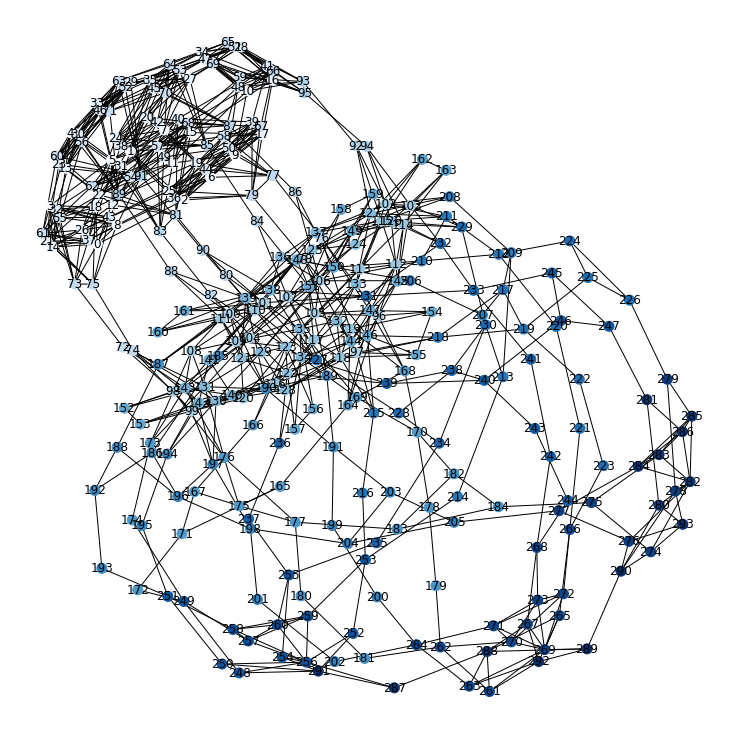

In [0]:
gm.draw_graph(graph_sat_mis)

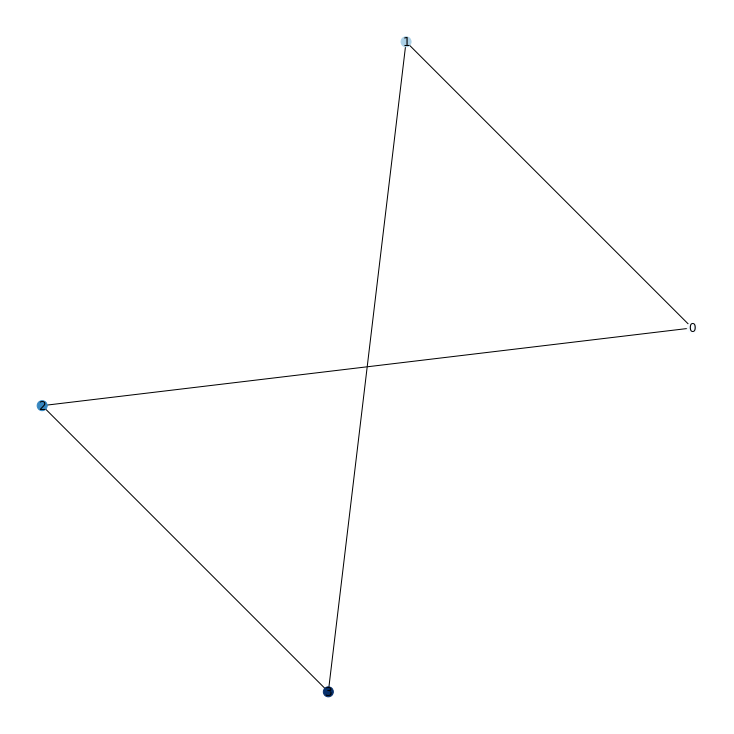

In [0]:
gm.draw_graph(graph)